<a href="https://colab.research.google.com/github/ana-mikaC/Satellite-Data-Analyses/blob/main/Making_Dispersion_Maps_of_Andromeda_for_3_Types_of_Stars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Anamika Chakrabarty

# Making Dispersion Maps and Histograms using Python code

Making dispersion maps of Andromeda for 3 different types of stars:
* Main Sequence (MS) stars,
* Red Giant Branch (RGB) stars, and
* Asymptotic Giant Branch (AGB) stars.

We want to understand what these three maps tell us about the history of the Andromeda galaxy.

-Completed as apart of NASA SEES Advanced Python Coding Course

In [ ]:
#importing needed modules
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
# Mount the Google Drive.
from google.colab import drive
drive.mount('/content/drive')
# import os.path
from os import path as path

# here is the standard path to our mySEES folder
catalog_folder = '/content/drive/MyDrive/mySEES'
print("My path to the mySEES folder is {}".format(catalog_folder))

Mounted at /content/drive
My path to the mySEES folder is /content/drive/MyDrive/mySEES


##An 'old' function revisited and a new one presented


In [ ]:
def show_map(xi, eta, quantity, label, fileName):
    ax = plt.axes(aspect = 'equal')
    ax.set_xlabel('xi (kpc)')
    ax.set_ylabel('eta (kpc)')
    ax.set_title('Dispersion of Real Data')
    tt = ax.scatter(xi, eta, c = quantity, edgecolors = 'none', s = 2, vmin=40., vmax=160.)
    ax.set_xlim(1, 0)
    plt.colorbar(tt, label='Velocity Dispersion (km/s)')
    plt.savefig(fileName)

Calculating the dispersion.

In [ ]:
def get_dispersion(x, z, v, circleSize=300./3600.):
    #initialize dispersion to all zeros
    dispersion = np.zeros(len(x))

    #Loop over all items in list
    for i in range(len(x)):
        #get coordinates of the item of interest
        thisX = x[i]
        thisZ = z[i]

        #calculate array of distances to this star
        dist = np.sqrt((x-thisX)**2+(z-thisZ)**2)

        #pick out stars that are closer than circleSize to the star
        keep = dist < circleSize

        #calculate the velocity dispersion of those stars; assign to the ith element
        #of the array "dispersion"
        dispersion[i] = np.std(v[keep])

    return dispersion

The following lines of code are going to call the above two functions to generate the plots I am interested in. It is going to read in the catalogs that I created while completing a previous activity.


In [ ]:
team_code = 'O-AL'
last_name = 'Chakrabarty'
initial = 'A'

/content/drive/MyDrive/mySEES/MScatalog.txt
/content/drive/MyDrive/mySEES/sMS_dispersion_O-AL_Chakrabarty_A.png


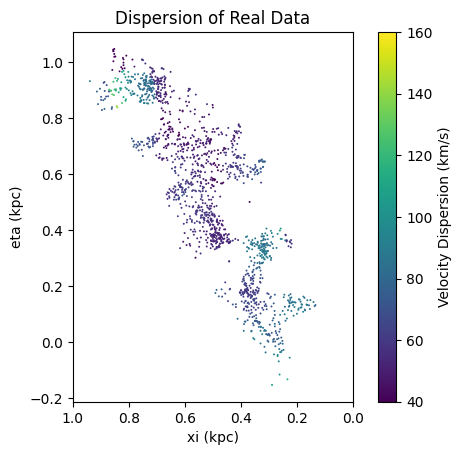

In [ ]:
# complete path and file name of the input star catalog
star_type = 'MS'
my_catalog = path.join(catalog_folder, star_type + 'catalog.txt')
print(my_catalog)
# complete path and file name of the output dispersion map PNG file

pngName = "s{}_dispersion_{}_{}_{}.png".format(star_type,
                                               team_code,last_name,initial)
my_png = path.join(catalog_folder, pngName)
print(my_png)

#Read data
xi, eta, v = np.loadtxt(my_catalog, unpack = True, usecols = (2, 3, 6))

##IMPORTANT: THESE NEXT FEW LINES ACCOUNT FOR A BUG IN THE CATALOGS.
##MAKE SURE YOU INCLUDE THESE LINES IN YOUR AGB AND RGB CODES.
#___________________________
keep=(np.abs(v) < 1000.)
xi=xi[keep]
eta=eta[keep]
v=v[keep]
#___________________________

#Calculate dispersion
ms_sigma = get_dispersion(xi, eta, v)
#print np.min(sigma), np.max(sigma), np.mean(sigma)

#Generate velocity map and save as PNG
show_map(xi, eta, ms_sigma, 'Velocity dispersion (km/s)', my_png)

/content/drive/MyDrive/mySEES/AGBcatalog.txt
/content/drive/MyDrive/mySEES/sAGB_dispersion_O-AL_Chakrabarty_A.png


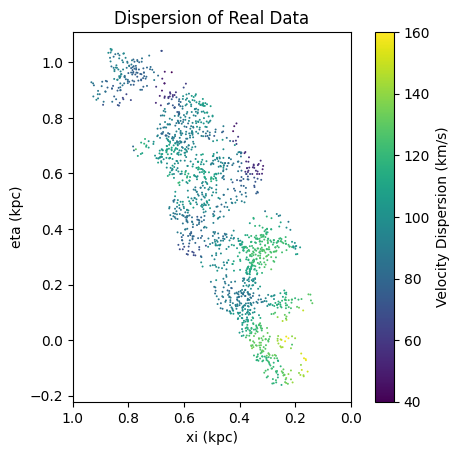

In [ ]:
#Filling in code for the AGB stars here!
# complete path and file name of the input star catalog
star_type = 'AGB'
my_catalog = path.join(catalog_folder, star_type + 'catalog.txt')
print(my_catalog)
# complete path and file name of the output dispersion map PNG file

pngName = "s{}_dispersion_{}_{}_{}.png".format(star_type,
                                               team_code,last_name,initial)
my_png = path.join(catalog_folder, pngName)
print(my_png)

#Read data
xi, eta, v = np.loadtxt(my_catalog, unpack = True, usecols = (2, 3, 6))

##IMPORTANT: THESE NEXT FEW LINES ACCOUNT FOR A BUG IN THE CATALOGS.
##MAKE SURE To INCLUDE THESE LINES IN  AGB AND RGB CODES.
#___________________________
keep=(np.abs(v) < 1000.)
xi=xi[keep]
eta=eta[keep]
v=v[keep]
#___________________________

#Calculate dispersion
agb_sigma = get_dispersion(xi, eta, v)
#print np.min(sigma), np.max(sigma), np.mean(sigma)

#Generate velocity map and save as PNG
show_map(xi, eta, agb_sigma, 'Velocity dispersion (km/s)', my_png)

/content/drive/MyDrive/mySEES/RGBcatalog.txt
/content/drive/MyDrive/mySEES/sRGB_dispersion_O-AL_Chakrabarty_A.png


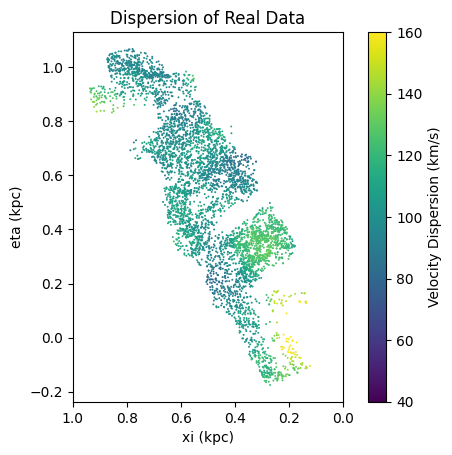

In [ ]:
#Fill in your code for the RGB stars here!
# complete path and file name of the input star catalog
star_type = 'RGB'
my_catalog = path.join(catalog_folder, star_type + 'catalog.txt')
print(my_catalog)
# complete path and file name of the output dispersion map PNG file

pngName = "s{}_dispersion_{}_{}_{}.png".format(star_type,
                                               team_code,last_name,initial)
my_png = path.join(catalog_folder, pngName)
print(my_png)

#Read data
xi, eta, v = np.loadtxt(my_catalog, unpack = True, usecols = (2, 3, 6))

##IMPORTANT: THESE NEXT FEW LINES ACCOUNT FOR A BUG IN THE CATALOGS.
##MAKE SURE TO INCLUDE THESE LINES IN AGB AND RGB CODES.
#___________________________
keep=(np.abs(v) < 1000.)
xi=xi[keep]
eta=eta[keep]
v=v[keep]
#___________________________

#Calculate dispersion
rgb_sigma = get_dispersion(xi, eta, v)
#print np.min(sigma), np.max(sigma), np.mean(sigma)

#Generate velocity map and save as PNG
show_map(xi, eta, rgb_sigma, 'Velocity dispersion (km/s)', my_png)

Plotting histograms for the velocity dispersions of the 3 types of stars.

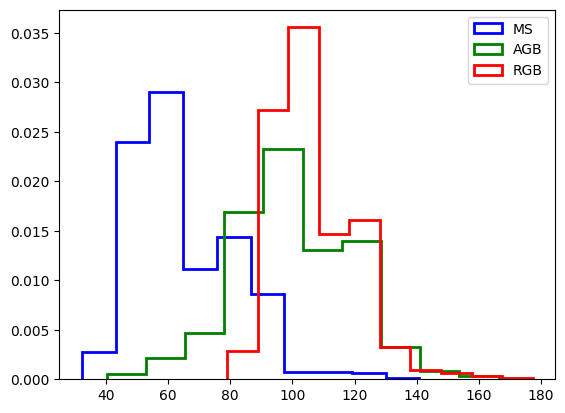

In [ ]:
#Put your histogram plotting code here! Be sure to run the code before submission.
plt.hist(ms_sigma, color = 'blue', histtype = 'step', linewidth = 2, label = 'MS', density = True)
plt.hist(agb_sigma, color = 'green', histtype = 'step', linewidth = 2, label = 'AGB', density = True)
plt.hist(rgb_sigma, color = 'red', histtype = 'step', linewidth = 2, label = 'RGB', density = True)
plt.legend()
plt.show()

### Math coding challenge

Computing the median velocity dispersion for each of the 3 age groups.

In [ ]:
#Compute and print the median values here!
print("MS mean:", np.mean(ms_sigma))
print("AGB mean:", np.mean(agb_sigma))
print("RGB mean: ", np.mean(rgb_sigma))
print("MS velocity dispersion median:", np.median(ms_sigma))
print("AGB velocity dispersion median:", np.median(agb_sigma))
print("RGB velocity dispersion median:", np.median(rgb_sigma))


MS mean: 65.23077476108917
AGB mean: 100.133223383077
RGB mean:  106.95235802864148
MS velocity dispersion median: 60.42529202786426
AGB velocity dispersion median: 98.51101300283622
RGB velocity dispersion median: 104.14787497316647


# This is an individual project I based on the NASA SEES course and tutorials by: Prof. Raja GuhaThakurta of UCSC and the Science Internship Program
This Python tutorial that this project is based on was originally developed by Dr. Raja GuhaThakurta and his astronomy graduate students as part of the [Science Internship Program (SIP)](https://sip.ucsc.edu/about/) for Bay Area high school students at the University of California Santa Cruz (UCSC). Dr. GuhaThakurta's tutorial is called Python and Research (PyaR).

SEES thanks Dr. GuhaThakurta for his generosity in sharing Jupyter notebooks, video tutorials, data, and related resources.

In 2020, a SEES mentor adapted Dr. GuhaThakurta's tutorials to run in the Google Colaboratory. The current notebook has been updated for 2023 SEES.  